<a href="https://colab.research.google.com/github/pyGuru123/Python-Space-Science/blob/main/Mars%20InSight/marsWI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mars Weather and Imagery

This notebook deals with Mars Weather and latest images taken by the rover Insight, Curiosity and Spirit using the open APIs provided by NASA.

![Mars](https://pmdvod.nationalgeographic.com/NG_Video/863/99/lgpost_1527179958264.jpg)

The notebook uses two APIs
* Mars Insight Weather Data
* Mars Rover photos Api 

These apis used below require an api key to access them, yo can get a free api key and read the api documentation  from the link below

[Get API Key]('https://api.nasa.gov/')

## Mars Insight Weather

NASA’s InSight Mars lander takes continuous weather measurements (temperature, wind, pressure) on the surface of Mars at Elysium Planitia, a flat, smooth plain near Mars’ equator. Summaries of these data are available at https://mars.nasa.gov/insight/weather/.

This API provides per-Sol summary data for each of the last seven available Sols (Martian Days). As more data from a particular Sol are downlinked from the spacecraft (sometimes several days later), these values are recalculated, and consequently may change as more data are received on Earth.

Installing required modules

In [4]:
!pip install portolan

Importing modules

In [11]:
import requests
import portolan
from pprint import pprint

In [8]:
portolan.point(degree=135.0)

'southeast'

an api key is reqired for further code to work, so get a free api key for yourself from here [Get API Key]('https://api.nasa.gov/')

In [10]:
api_key = 'your_api_key_here'
url = f'https://api.nasa.gov/insight_weather/?api_key={api_key}&feedtype=json&ver=1.0'

url

'https://api.nasa.gov/insight_weather/?api_key=19Pdj0sljBhhoS6lnlIZEK6LTnsTEbKkvutr12f0&feedtype=json&ver=1.0'

In [19]:
r = requests.get(url)
data = r.json()
print(data)

{'736': {'AT': {'av': -67.551, 'ct': 179751, 'mn': -94.458, 'mx': -8.835}, 'First_UTC': '2020-12-21T10:47:11Z', 'HWS': {'av': 3.656, 'ct': 96476, 'mn': 0.209, 'mx': 14.597999999999999}, 'Last_UTC': '2020-12-22T11:26:44Z', 'PRE': {'av': 720.385, 'ct': 105415, 'mn': 690.0308, 'mx': 739.5988}, 'Season': 'fall', 'WD': {'0': {'compass_degrees': 0.0, 'compass_point': 'N', 'compass_right': 0.0, 'compass_up': 1.0, 'ct': 420}, '1': {'compass_degrees': 22.5, 'compass_point': 'NNE', 'compass_right': 0.382683432365, 'compass_up': 0.923879532511, 'ct': 1179}, '10': {'compass_degrees': 225.0, 'compass_point': 'SW', 'compass_right': -0.707106781187, 'compass_up': -0.707106781187, 'ct': 18347}, '11': {'compass_degrees': 247.5, 'compass_point': 'WSW', 'compass_right': -0.923879532511, 'compass_up': -0.382683432365, 'ct': 11378}, '12': {'compass_degrees': 270.0, 'compass_point': 'W', 'compass_right': -1.0, 'compass_up': -0.0, 'ct': 16855}, '13': {'compass_degrees': 292.5, 'compass_point': 'WNW', 'compas

In [18]:
sols_checked = data['sol_keys']
sols_checked

['736', '737', '738', '739', '740', '741']

Checking weather of the first day

In [20]:
first_day = data[sols_checked[0]]
first_day

{'AT': {'av': -67.551, 'ct': 179751, 'mn': -94.458, 'mx': -8.835},
 'First_UTC': '2020-12-21T10:47:11Z',
 'HWS': {'av': 3.656, 'ct': 96476, 'mn': 0.209, 'mx': 14.597999999999999},
 'Last_UTC': '2020-12-22T11:26:44Z',
 'PRE': {'av': 720.385, 'ct': 105415, 'mn': 690.0308, 'mx': 739.5988},
 'Season': 'fall',
 'WD': {'0': {'compass_degrees': 0.0,
   'compass_point': 'N',
   'compass_right': 0.0,
   'compass_up': 1.0,
   'ct': 420},
  '1': {'compass_degrees': 22.5,
   'compass_point': 'NNE',
   'compass_right': 0.382683432365,
   'compass_up': 0.923879532511,
   'ct': 1179},
  '10': {'compass_degrees': 225.0,
   'compass_point': 'SW',
   'compass_right': -0.707106781187,
   'compass_up': -0.707106781187,
   'ct': 18347},
  '11': {'compass_degrees': 247.5,
   'compass_point': 'WSW',
   'compass_right': -0.923879532511,
   'compass_up': -0.382683432365,
   'ct': 11378},
  '12': {'compass_degrees': 270.0,
   'compass_point': 'W',
   'compass_right': -1.0,
   'compass_up': -0.0,
   'ct': 16855}

Date of observation

In [21]:
date = first_day['First_UTC']
date

'2020-12-21T10:47:11Z'

Atmospheric temperature (in Celsius)

In [22]:
temp = first_day['AT']
temp

{'av': -67.551, 'ct': 179751, 'mn': -94.458, 'mx': -8.835}

In [23]:
minimum = temp['mn']
maximum = temp['mx']
average = temp['av']

print(minimum, maximum, average)

-94.458 -8.835 -67.551


Pressure (in Pascals)

In [24]:
pressure = first_day['PRE']
pressure

{'av': 720.385, 'ct': 105415, 'mn': 690.0308, 'mx': 739.5988}

In [26]:
minimum = pressure['mn']
maximum = pressure['mx']
average = pressure['av']

print(minimum, maximum, average)

690.0308 739.5988 720.385


Horizontal Windspeed (in m/s)

In [27]:
wind = first_day['HWS']
wind

{'av': 3.656, 'ct': 96476, 'mn': 0.209, 'mx': 14.597999999999999}

In [28]:
minimum = wind['mn']
maximum = wind['mx']
average = wind['av']

print(minimum, maximum, average)

0.209 14.597999999999999 3.656


Wind direction summary for 16 compass points

In [31]:
wds = first_day['WD']

for point in wds:
    point = str(point)
    values = wds[point]
    degree = values['compass_degrees']
    print('Degrees :', degree, end='\t')
    print('Direction :', portolan.point(degree=degree), end='\t')
    print('Horizontal Component of Unit Vector :', values['compass_right'], end='\t')
    print('Vertical Component of Unit Vector :', values['compass_up'])


Degrees : 0.0	Direction : north	Horizontal Component of Unit Vector : 0.0	Vertical Component of Unit Vector : 1.0
Degrees : 22.5	Direction : north-northeast	Horizontal Component of Unit Vector : 0.382683432365	Vertical Component of Unit Vector : 0.923879532511
Degrees : 225.0	Direction : southwest	Horizontal Component of Unit Vector : -0.707106781187	Vertical Component of Unit Vector : -0.707106781187
Degrees : 247.5	Direction : west-southwest	Horizontal Component of Unit Vector : -0.923879532511	Vertical Component of Unit Vector : -0.382683432365
Degrees : 270.0	Direction : west	Horizontal Component of Unit Vector : -1.0	Vertical Component of Unit Vector : -0.0
Degrees : 292.5	Direction : west-northwest	Horizontal Component of Unit Vector : -0.923879532511	Vertical Component of Unit Vector : 0.382683432365
Degrees : 315.0	Direction : northwest	Horizontal Component of Unit Vector : -0.707106781187	Vertical Component of Unit Vector : 0.707106781187
Degrees : 337.5	Direction : north-nort

## Mars Imagery

This API is designed to collect image data gathered by NASA's Curiosity, Opportunity, and Spirit rovers on Mars and make it more easily available to other developers, educators, and citizen scientists. This API is maintained by Chris Cerami.

Each rover has its own set of photos stored in the database, which can be queried separately. There are several possible queries that can be made against the API. Photos are organized by the sol (Martian rotation or day) on which they were taken, counting up from the rover's landing date. A photo taken on Curiosity's 1000th Martian sol exploring Mars, for example, will have a sol attribute of 1000. If instead you prefer to search by the Earth date on which a photo was taken, you can do that too.

Each camera has a unique function and perspective, and they are named as follows:

![](https://drive.google.com/uc?export=view&id=1GS-qAWEuhr8wVDNHoQqKVEFsx5AAFKh0)

In [88]:
rover = 'curiosity'
date = '2020-12-1'
api_key = 'your_api_key_here'

url = f'https://api.nasa.gov/mars-photos/api/v1/rovers/{rover}/photos?earth_date={date}&api_key={api_key}'
url

'https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?earth_date=2020-12-1&api_key=your_api_key_here'

In [75]:
r = requests.get(url)
data = r.json()

# taking only first 10 photos, you can remove slicing to get all image links
photos = data['photos'][:10]
photos

[{'camera': {'full_name': 'Front Hazard Avoidance Camera',
   'id': 20,
   'name': 'FHAZ',
   'rover_id': 5},
  'earth_date': '2020-12-01',
  'id': 780204,
  'img_src': 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02958/opgs/edr/fcam/FLB_660095006EDR_F0840444FHAZ00302M_.JPG',
  'rover': {'id': 5,
   'landing_date': '2012-08-06',
   'launch_date': '2011-11-26',
   'name': 'Curiosity',
   'status': 'active'},
  'sol': 2958},
 {'camera': {'full_name': 'Front Hazard Avoidance Camera',
   'id': 20,
   'name': 'FHAZ',
   'rover_id': 5},
  'earth_date': '2020-12-01',
  'id': 780205,
  'img_src': 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02958/opgs/edr/fcam/FRB_660095006EDR_F0840444FHAZ00302M_.JPG',
  'rover': {'id': 5,
   'landing_date': '2012-08-06',
   'launch_date': '2011-11-26',
   'name': 'Curiosity',
   'status': 'active'},
  'sol': 2958},
 {'camera': {'full_name': 'Front Hazard Avoidance Camera',
   'id': 20,
   'name': 'FHAZ',
   'r

Downloading & Displaying Images

In [44]:
from IPython.display import Image

In [76]:
for index, photo in enumerate(photos):
    camera = photo['camera']
    rover = photo['rover']
    print('rover name :', rover['name'])
    print('camera_name :', camera['name'])
    print('full camera_name :', camera['full_name'])
    print('date of photo :', photo['earth_date'])
    
    img_url = photo['img_src']

    r = requests.get(img_url)
    img = f'{index}.jpg'
    with open(img, 'wb') as file:
        file.write(r.content)

    print()

rover name : Curiosity
camera_name : FHAZ
full camera_name : Front Hazard Avoidance Camera
date of photo : 2020-12-01

rover name : Curiosity
camera_name : FHAZ
full camera_name : Front Hazard Avoidance Camera
date of photo : 2020-12-01

rover name : Curiosity
camera_name : FHAZ
full camera_name : Front Hazard Avoidance Camera
date of photo : 2020-12-01

rover name : Curiosity
camera_name : FHAZ
full camera_name : Front Hazard Avoidance Camera
date of photo : 2020-12-01

rover name : Curiosity
camera_name : FHAZ
full camera_name : Front Hazard Avoidance Camera
date of photo : 2020-12-01

rover name : Curiosity
camera_name : FHAZ
full camera_name : Front Hazard Avoidance Camera
date of photo : 2020-12-01

rover name : Curiosity
camera_name : FHAZ
full camera_name : Front Hazard Avoidance Camera
date of photo : 2020-12-01

rover name : Curiosity
camera_name : FHAZ
full camera_name : Front Hazard Avoidance Camera
date of photo : 2020-12-01

rover name : Curiosity
camera_name : FHAZ
full c

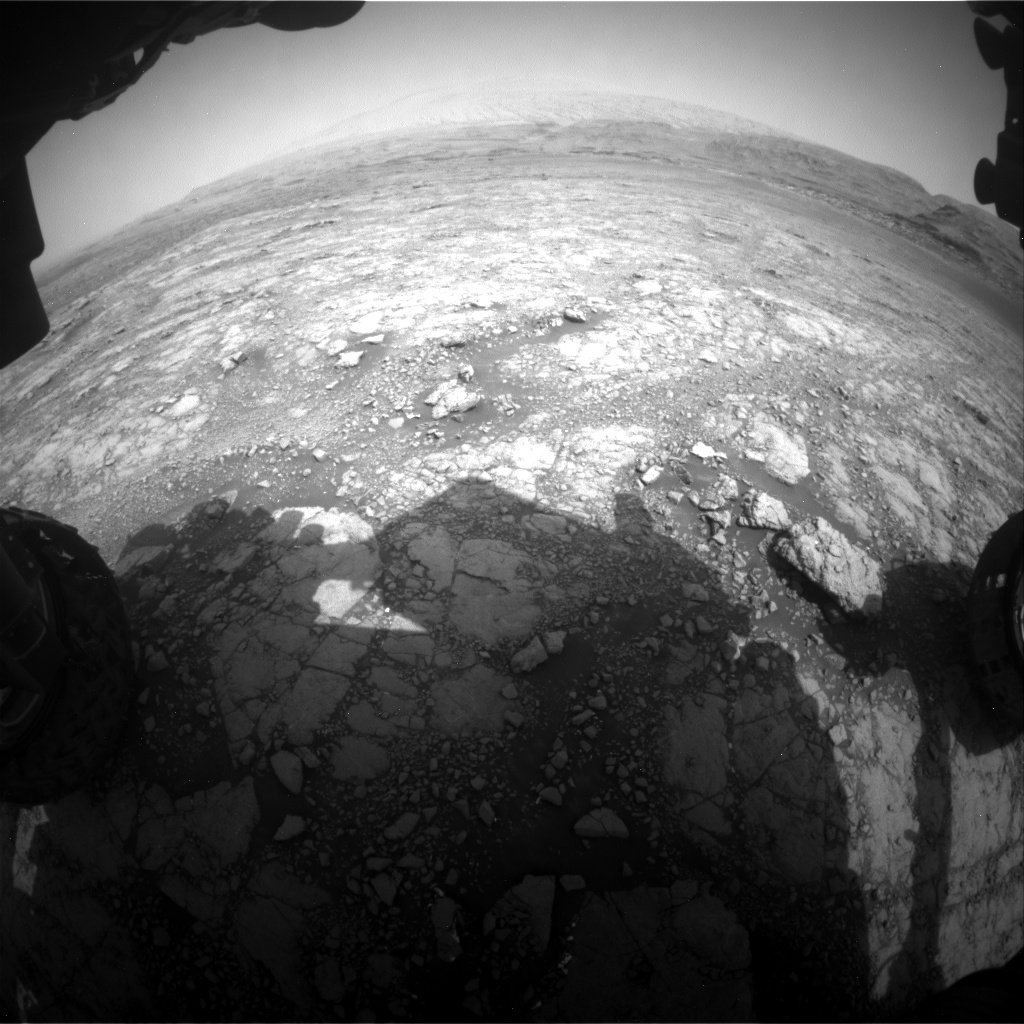

In [77]:
Image('0.jpg', width=250, height=250)

Making a Image Collage

In [71]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [78]:
all_images = []

for i in range(10):
    img = f'{i}.jpg'
    image  = cv2.imread(img)
    resized = cv2.resize(image, (250, 250))
    all_images.append(resized)

In [79]:
len(all_images)

10

In [ ]:
h1 = np.hstack(all_images[:5])
h2 = np.hstack(all_images[5:])
v = np.vstack([h1, h2])
v

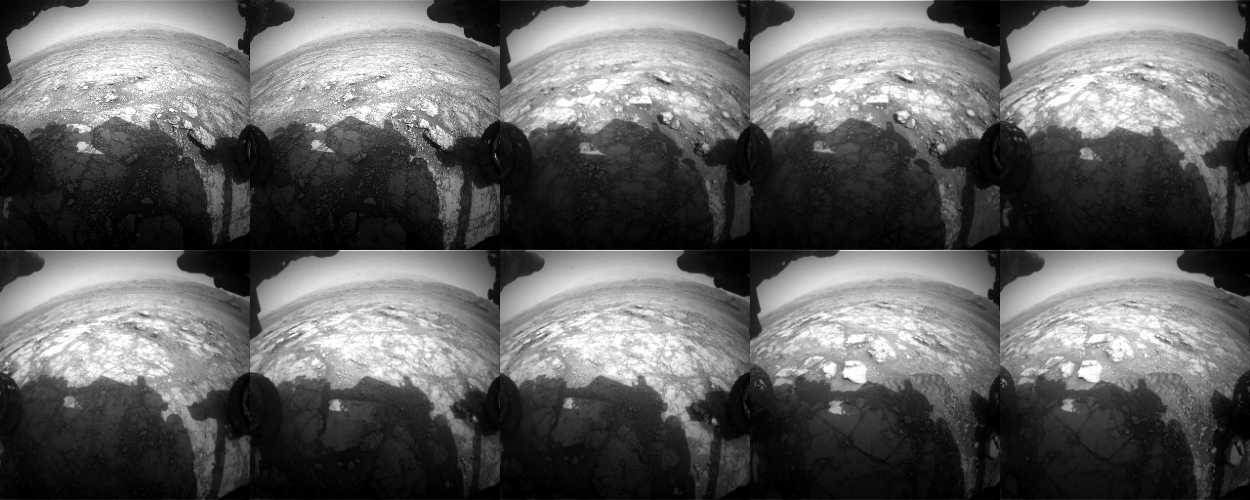

In [81]:
cv2_imshow(v)

Taking images by camera name

In [82]:
api_key = 'your_api_key_here'
camera = 'fhaz'  # default is all
url = f'https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?sol=1000&camera={camera}&api_key={api_key}'

r = requests.get(url)
data = r.json()
photo = data['photos']

In [84]:
img_url = photo[0]['img_src']

r = requests.get(img_url)
img = 'mars_image.jpg'
with open(img, 'wb') as file:
    file.write(r.content)

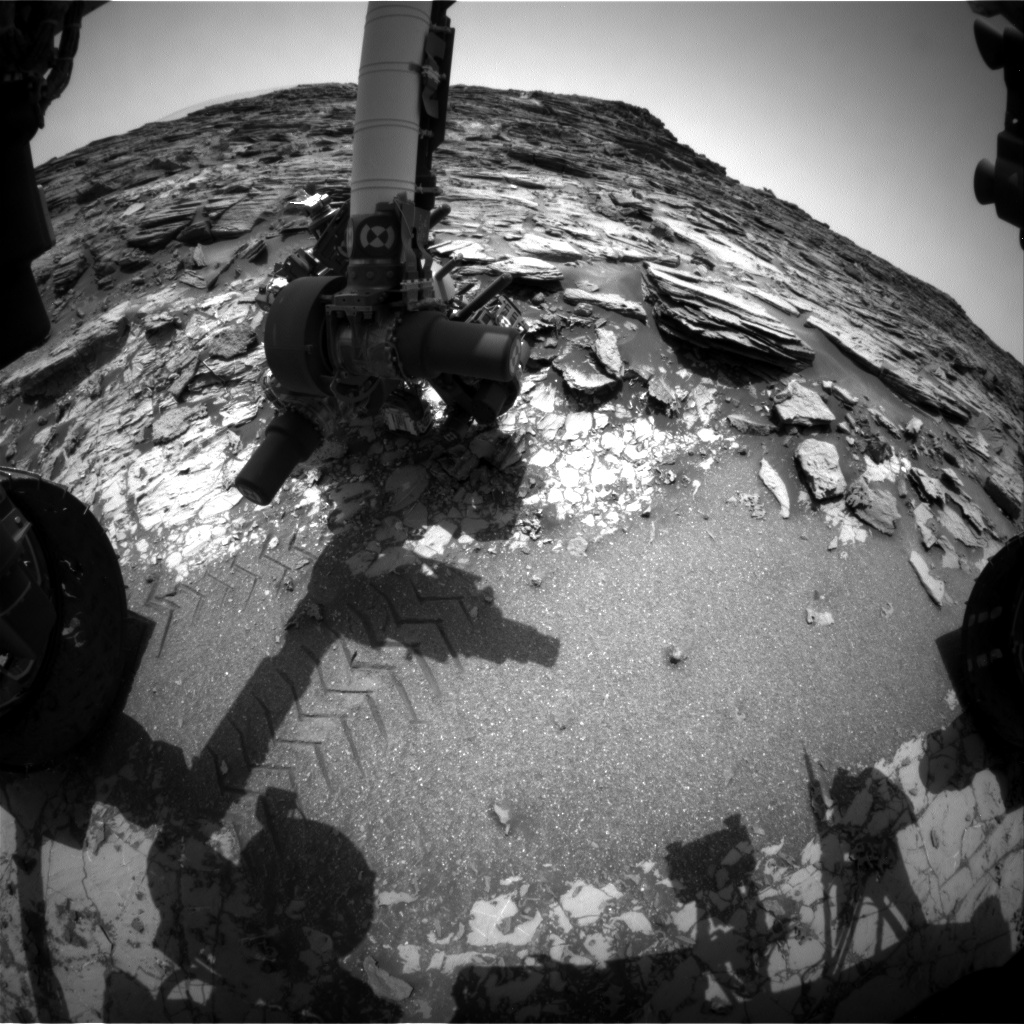

In [86]:
Image('mars_image.jpg')

That's all